In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [61]:
print(df.duplicated().sum())
print(df.isna().sum())
print(df.shape)

0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64
(1000, 8)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [63]:
for col in df.columns:
    if df[col].dtype=='object':
        print(f"unique Categories in {col} :", df[col].unique())

unique Categories in gender : ['female' 'male']
unique Categories in race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
unique Categories in parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique Categories in lunch : ['standard' 'free/reduced']
unique Categories in test_preparation_course : ['none' 'completed']


In [64]:
df['total']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=(df['total'])/3

In [65]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


[]

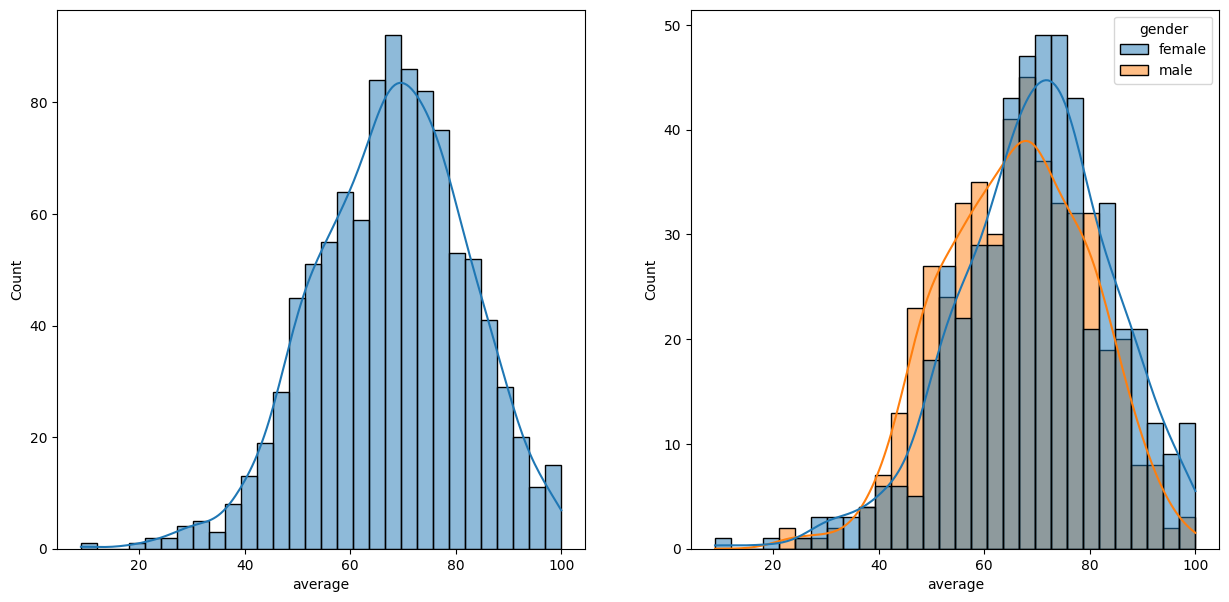

In [66]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,bins=30)
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,bins=30,hue='gender')
plt.plot()

[]

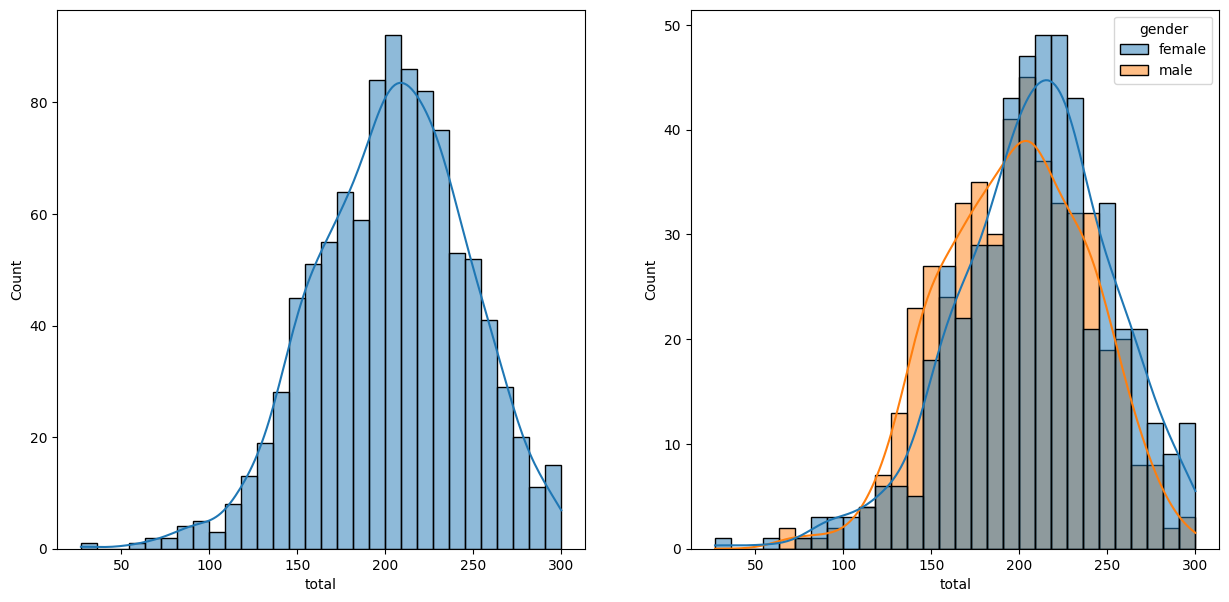

In [67]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total',kde=True,bins=30)
plt.subplot(122)
sns.histplot(data=df,x='total',kde=True,bins=30,hue='gender')
plt.plot()

In [ ]:
#modelling
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import warnings


In [69]:
df=pd.read_csv('data/stud.csv')
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [70]:
y=df['math_score']
x=df.drop(columns=['math_score'],axis=1)

In [71]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer,cat_features),
        ("StandardScaler", numeric_transformer,num_features),
    ]
)


In [72]:
X=preprocessor.fit_transform(x)
X.shape

(1000, 19)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    r2_square=r2_score(true,predicted)
    return mae,mse,r2_square

In [76]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
}

model_list = []
r2_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"\n{name}")
    print("Model performance for Training set")
    print(f"- Mean Squared Error: {model_train_mse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")
    print('----------------------------------')
    print("Model performance for Test set")
    print(f"- Mean Squared Error: {model_test_mse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    print('=' * 35)

    model_list.append(name)
    r2_list.append(model_test_r2)



Linear Regression
Model performance for Training set
- Mean Squared Error: 27.5447
- Mean Absolute Error: 4.1985
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Mean Squared Error: 30.8866
- Mean Absolute Error: 4.4183
- R2 Score: 0.8759

Lasso
Model performance for Training set
- Mean Squared Error: 42.3875
- Mean Absolute Error: 5.1582
- R2 Score: 0.8078
----------------------------------
Model performance for Test set
- Mean Squared Error: 47.2041
- Mean Absolute Error: 5.3929
- R2 Score: 0.8103

Ridge
Model performance for Training set
- Mean Squared Error: 27.5484
- Mean Absolute Error: 4.1977
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Mean Squared Error: 30.8757
- Mean Absolute Error: 4.4155
- R2 Score: 0.8759

Random Forest Regressor
Model performance for Training set
- Mean Squared Error: 5.3762
- Mean Absolute Error: 1.8369
- R2 Score: 0.9756
----------------------------------
Model performance

In [80]:

results = pd.DataFrame({
    'Model': model_list,
    'Test R²': r2_list
}).sort_values(by='Test R²', ascending=False)

print("\nModel Comparison:")
print(results)


Model Comparison:
                     Model   Test R²
2                    Ridge  0.875907
0        Linear Regression  0.875863
3  Random Forest Regressor  0.848108
5       AdaBoost Regressor  0.835392
4             XGBRegressor  0.811816
1                    Lasso  0.810281
